[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gwatkinson/NLP_Assemblee/blob/develop/docs/notebooks/processing.ipynb)

# Processing the data compiled from the API

In this notebook, we process the data obtained from the API, resulting in a dataframe that can be used for further analysis.

The compiled data is stored in the `data/compiled` folder.

The processed data is then stored in the `data/processed` folder.

The module `data_processing` contains the functions used to process the data.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from nlp_assemblee.data_processing import DataProcessing

/home/gwatk/Documents/MVA/DL/NLP_Assemblee/nlp_assemblee/data_processing.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

[autoreload of nlp_assemblee.data_processing failed: Traceback (most recent call last):
  File "/home/gwatk/miniconda3/envs/pytorch-11-7/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/home/gwatk/miniconda3/envs/pytorch-11-7/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 484, in superreload
    update_generic(old_obj, new_obj)
  File "/home/gwatk/miniconda3/envs/pytorch-11-7/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 381, in update_generic
    update(a, b)
  File "/home/gwatk/miniconda3/envs/pytorch-11-7/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 349, in update_class
    update_instances(old, new)
  File "/home/gwatk/miniconda3/envs/pytorch-11-7/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 303, in update_instances
    refs = gc.get_referrers(old)
KeyboardInterrupt
]


In [4]:
# label_dict_15th = {
#     "NI": 2,
#     "UAI": 2,
#     "LC": 2,
#     "LR": 2,
#     "LFI": 0,
#     "NG": 0,
#     "GDR": 0,
#     "LREM": 1,
#     "MODEM": 1,
# }

# processor15 = DataProcessing(
#     deputies_df_path="../../data/compiled/15th_deputies.pkl",
#     compiled_data_path="../../data/compiled/15th_legislature_complete.tsv",
#     # process=False,
#     # save=False
#     process=True,
#     max_len=512,
#     save="../../data/processed",
#     legislature=15,
# )

In [5]:
label_dict_14th = {
    "SRC": 0,
    "ECOLO": 0,
    "SER": 0,
    "GDR": 0,
    "UDI": 1,
    "RRDP": 1,
    "LR": 2,
    "UMP": 2,
    "RUMP": 2,
    "NI": 2,
}

processor14 = DataProcessing(
    deputies_df_path="../../data/compiled/14th_deputies.pkl",
    compiled_data_path="../../data/compiled/14th_legislature_complete.tsv",
    # process=False,
    # save=False,
    label_dict=label_dict_14th,
    process=True,
    tokenize=True,
    max_len=512,
    year_min=1940,
    year_max=2022,
    save="../../data/processed",
    legislature=14,
)

Cleaning the deputies dataframe...
Cleaning the compiled dataset...
Merging the two dataframes...
Tokenizing the resulting data...


  0%|          | 0/363572 [00:00<?, ?it/s]

Saving the processed data...


## Exploring the deputies dataframe

In [176]:
processor14.deputies_df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    648 non-null    int64 
 1   nom                   648 non-null    object
 2   nom_de_famille        648 non-null    object
 3   prenom                648 non-null    object
 4   sexe                  648 non-null    object
 5   date_naissance        648 non-null    object
 6   lieu_naissance        645 non-null    object
 7   num_deptmt            648 non-null    object
 8   nom_circo             648 non-null    object
 9   num_circo             648 non-null    int64 
 10  mandat_debut          648 non-null    object
 11  mandat_fin            648 non-null    object
 12  ancien_depute         648 non-null    int64 
 13  groupe_sigle          648 non-null    object
 14  parti_ratt_financier  648 non-null    object
 15  anciens_mandats       648 non-null    ob

In [177]:
processor14.deputies_df_processed.head()

,id,nom,nom_de_famille,prenom,sexe,date_naissance,lieu_naissance,num_deptmt,nom_circo,num_circo,...,mandat_fin,ancien_depute,groupe_sigle,parti_ratt_financier,anciens_mandats,profession,place_en_hemicycle,slug,nb_mandats,legislature
0,1,Jean-François Lamour,Lamour,Jean-François,H,1956-02-02,Paris (Paris),75,Paris,13,...,2017-06-20,1,LR,Les Républicains,[{'mandat': '20/06/2007 / 19/06/2012 / fin de ...,Kinésithérapeute,80,jean-francois-lamour,2,2012-2017
1,2,Jean-Michel Clément,Clément,Jean-Michel,H,1954-10-31,Mauprevoir (Vienne),86,Vienne,3,...,2017-06-20,1,SER,Parti socialiste,[{'mandat': '20/06/2007 / 19/06/2012 / fin de ...,Avocat,263,jean-michel-clement,2,2012-2017
2,3,Bernard Reynès,Reynès,Bernard,H,1953-10-18,Meknès (Maroc),13,Bouches-du-Rhône,15,...,2017-06-20,1,LR,Les Républicains,[{'mandat': '20/06/2007 / 19/06/2012 / fin de ...,Chirurgien-Dentiste,190,bernard-reynes,2,2012-2017
3,4,Sandrine Hurel,Hurel,Sandrine,F,1968-08-07,Lisieux (Calvados),76,Seine-Maritime,6,...,2015-08-27,1,,Parti socialiste,[{'mandat': '20/06/2007 / 19/06/2012 / fin de ...,Secrétaire de direction,460,sandrine-hurel,2,2012-2017
4,5,Marc Laffineur,Laffineur,Marc,H,1945-08-10,Maubeuge (Nord),49,Maine-et-Loire,7,...,2017-06-20,1,LR,Les Républicains,"[{'mandat': '20/06/2012 / / '}, {'mandat': '0...",Médecin anesthésiste-réanimateur,183,marc-laffineur,2,2012-2017


In [178]:
ddf = processor14.deputies_df_processed.copy()
ddf["date_naissance"] = pd.to_datetime(ddf["date_naissance"])

In [179]:
sns.set_style("ticks")
sns.set_context("paper")
sns.set_palette("muted")
sns.despine()

<Figure size 640x480 with 0 Axes>

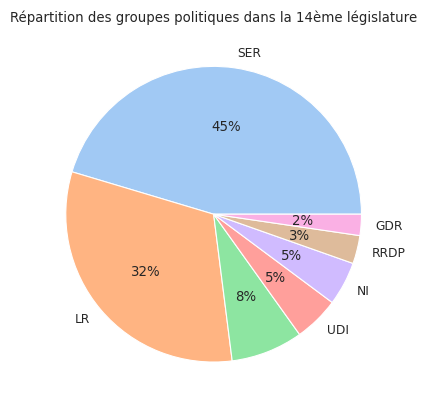

In [180]:
colors = sns.color_palette("pastel", as_cmap=True)
ax = ddf["groupe_sigle"].value_counts().plot.pie(colors=colors, autopct="%0.0f%%")
ax.set(ylabel="", title="Répartition des groupes politiques dans la 14ème législature");

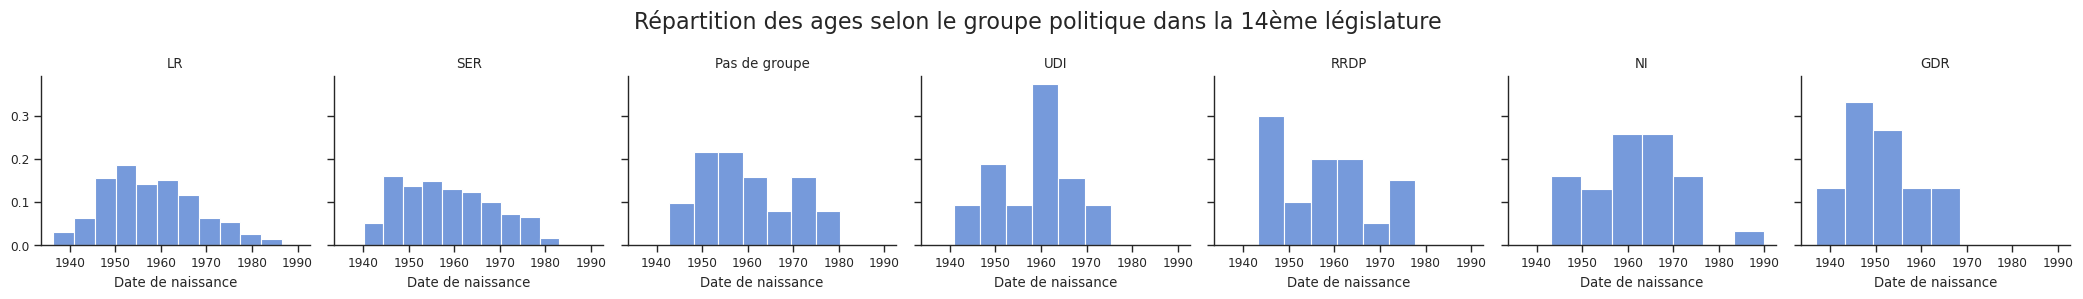

In [181]:
title = "Répartition des ages selon le groupe politique dans la 14ème législature"

g = sns.FacetGrid(ddf, col="groupe_sigle", margin_titles=True)
g.map(sns.histplot, "date_naissance", stat="probability")
g.set_axis_labels("Date de naissance", "")
g.figure.suptitle(title, fontsize=16)
for group in g.axes_dict:
    subtitle = group if group != "" else "Pas de groupe"
    g.axes_dict[group].set_title(subtitle)
g.figure.tight_layout()

In [182]:
sexe_df = ddf.groupby("groupe_sigle")["sexe"].value_counts(normalize=True, sort=True) * 100
sexe_df.name = "percentage"
sexe_df = sexe_df.reset_index()
sexe_df["groupe_sigle"] = sexe_df["groupe_sigle"].where(
    sexe_df["groupe_sigle"] != "", "Pas de groupe"
)

[Text(0.5, 0, 'Groupe politique'), Text(0, 0.5, 'Pourcentage')]

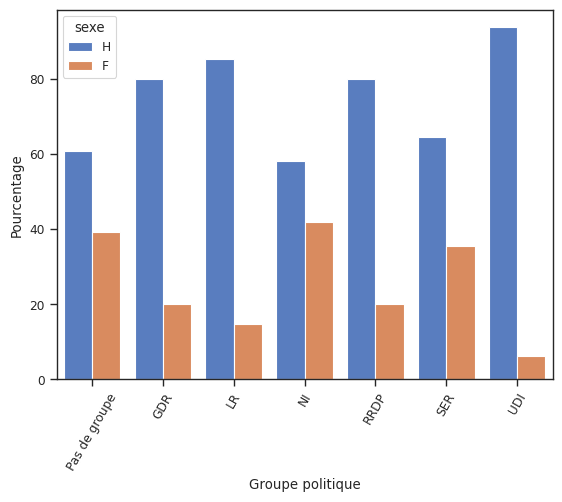

In [183]:
g = sns.barplot(data=sexe_df, y="percentage", x="groupe_sigle", hue="sexe")
plt.xticks(rotation=60)
g.set(xlabel="Groupe politique", ylabel="Pourcentage")

<AxesSubplot: xlabel='nb_mandats', ylabel='count'>

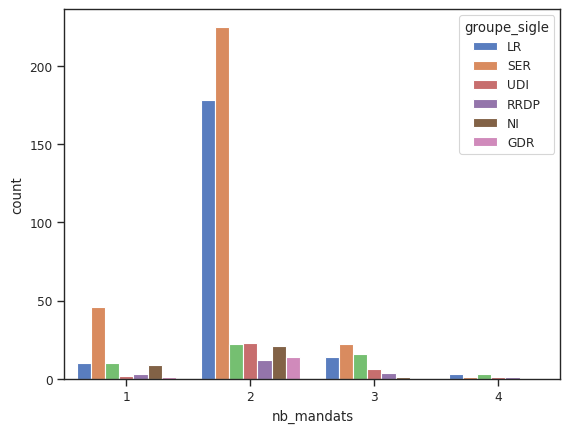

In [184]:
sns.countplot(data=ddf, x="nb_mandats", hue="groupe_sigle")

## Exploring the processed compiled dataframe

In [185]:
processor14.compiled_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458418 entries, 0 to 458417
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  458418 non-null  int64 
 1   seance_id           458418 non-null  int64 
 2   date                458418 non-null  object
 3   moment              458418 non-null  object
 4   type                458418 non-null  object
 5   titre_complet       458418 non-null  object
 6   titre               458418 non-null  object
 7   timestamp           458418 non-null  int64 
 8   intervention        458418 non-null  object
 9   nb_mots             458418 non-null  int64 
 10  personnalite        0 non-null       object
 11  depute              458418 non-null  object
 12  parlementaire_sexe  458418 non-null  object
 13  depute_groupe       458418 non-null  object
 14  fonction            83914 non-null   object
 15  source              458418 non-null  object
 16  in

In [186]:
processor14.compiled_data_processed.head()

,id,seance_id,date,moment,type,titre_complet,titre,timestamp,intervention,nb_mots,personnalite,depute,parlementaire_sexe,depute_groupe,fonction,source,intervention_count,nb_mots_approx
0,125,11,2012-07-03,15:00,loi,déclaration de politique générale du gouvernem...,déclaration de politique générale du gouvernem...,190,"Alors, arrêtez de dépenser !",8,NaN,Pierre Lellouche,H,UMP,NaN,http://www.assemblee-nationale.fr/14/cri/2011-...,1562,5
1,531,22,2012-07-04,15:00,loi,rappels au règlement,rappels au règlement,160,Commencez par respecter l'opposition ! (Protes...,16,NaN,Pierre Lellouche,H,UMP,NaN,http://www.assemblee-nationale.fr/14/cri/2011-...,1562,16
2,568,22,2012-07-04,15:00,loi,débat sur les résultats du conseil européen de...,débat sur les résultats du conseil européen de...,530,Apprenez à respecter le Parlement ! Où vous cr...,9,NaN,Pierre Lellouche,H,UMP,NaN,http://www.assemblee-nationale.fr/14/cri/2011-...,1562,10
3,827,22,2012-07-04,15:00,loi,débat sur les résultats du conseil européen de...,débat sur les résultats du conseil européen de...,3120,"Madame la présidente, monsieur le ministre, me...",186,NaN,Pierre Lellouche,H,UMP,NaN,http://www.assemblee-nationale.fr/14/cri/2011-...,1562,181
4,829,22,2012-07-04,15:00,loi,débat sur les résultats du conseil européen de...,débat sur les résultats du conseil européen de...,3140,"Bien sûr, les impôts vont à nouveau pleuvoir c...",64,NaN,Pierre Lellouche,H,UMP,NaN,http://www.assemblee-nationale.fr/14/cri/2011-...,1562,58


## Exploring the merged dataframe  

In [193]:
processor14.processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74608 entries, 0 to 74607
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   seance_id           74608 non-null  int64         
 1   date_seance         74608 non-null  object        
 2   nom                 74608 non-null  object        
 3   groupe              74608 non-null  object        
 4   titre               74608 non-null  object        
 5   titre_complet       74608 non-null  object        
 6   intervention_count  74608 non-null  int64         
 7   intervention        74608 non-null  object        
 8   nb_mots             74608 non-null  int64         
 9   nb_mots_approx      74608 non-null  int64         
 10  date_naissance      74608 non-null  object        
 11  sexe                74608 non-null  object        
 12  profession          74608 non-null  object        
 13  nb_mandats          74608 non-null  int64     

In [194]:
processor14.processed_data.head()

,seance_id,date_seance,nom,groupe,titre,titre_complet,intervention_count,intervention,nb_mots,nb_mots_approx,...,year,month,day,y_naissance,n_y_naissance,n_year,cos_month,sin_month,cos_day,sin_day
0,11,2012-07-03,André Chassaigne,GDR,déclaration de politique générale du gouvernement,déclaration de politique générale du gouvernem...,3634,Dois-je attendre M. le Premier ministre ? Mons...,30859,2432,...,2012,7,3,1950,0.878049,0.0,-0.866025,-0.5,0.820763,0.571268
1,22,2012-07-04,André Chassaigne,GDR,débat sur les résultats du conseil européen de...,débat sur les résultats du conseil européen de...,3634,Il faut vérifier que le peuple soit d'accord !,11,9,...,2012,7,4,1950,0.878049,0.0,-0.866025,-0.5,0.688967,0.724793
2,79,2012-07-18,André Chassaigne,GDR,article 2,projet de loi de finances rectificative pour 2...,3634,"Quand je vous écoute, chers collègues de l'opp...",1187,599,...,2012,7,18,1950,0.878049,0.0,-0.866025,-0.5,-0.874347,-0.485302
3,80,2012-07-19,André Chassaigne,GDR,article 3,projet de loi de finances rectificative pour 2...,3634,Cet article institue au titre de l'année 2012 ...,1910,354,...,2012,7,19,1950,0.878049,0.0,-0.866025,-0.5,-0.758758,-0.651372
4,112,2012-07-25,André Chassaigne,GDR,discussion générale,protection physique des matières nucléaires > ...,3634,"Madame la présidente, madame la ministre délég...",48330,1560,...,2012,7,25,1950,0.878049,0.0,-0.866025,-0.5,0.347305,-0.937752


In [206]:
processor14.short_interventions

,nom,groupe,seance_id,date_seance,titre,titre_complet,intervention,nb_mots,intervention_count,nb_mots_approx,...,year,month,day,y_naissance,n_y_naissance,n_year,cos_month,sin_month,cos_day,sin_day
0,Pierre Lellouche,UMP,11,2012-07-03,déclaration de politique générale du gouvernem...,déclaration de politique générale du gouvernem...,"Alors, arrêtez de dépenser !",8,1562,5,...,2012,7,3,1951,0.865854,0.0,-0.866025,-0.500000,0.820763,0.571268
1,Pierre Lellouche,UMP,22,2012-07-04,rappels au règlement,rappels au règlement,Commencez par respecter l'opposition ! (Protes...,16,1562,16,...,2012,7,4,1951,0.865854,0.0,-0.866025,-0.500000,0.688967,0.724793
2,Pierre Lellouche,UMP,22,2012-07-04,débat sur les résultats du conseil européen de...,débat sur les résultats du conseil européen de...,Apprenez à respecter le Parlement ! Où vous cr...,9,1562,10,...,2012,7,4,1951,0.865854,0.0,-0.866025,-0.500000,0.688967,0.724793
3,Pierre Lellouche,UMP,22,2012-07-04,débat sur les résultats du conseil européen de...,débat sur les résultats du conseil européen de...,"Madame la présidente, monsieur le ministre, me...",186,1562,181,...,2012,7,4,1951,0.865854,0.0,-0.866025,-0.500000,0.688967,0.724793
4,Pierre Lellouche,UMP,22,2012-07-04,débat sur les résultats du conseil européen de...,débat sur les résultats du conseil européen de...,"Bien sûr, les impôts vont à nouveau pleuvoir c...",64,1562,58,...,2012,7,4,1951,0.865854,0.0,-0.866025,-0.500000,0.688967,0.724793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458413,George Pau-Langevin,SER,7691,2017-02-14,recouvrement de recettes de service public par...,questions orales sans débat > recouvrement de ...,"En raison dun vide juridique, les services de...",316,18,42,...,2017,2,14,1948,0.902439,1.0,0.500000,0.866025,-0.954139,0.299363
458414,George Pau-Langevin,SER,7691,2017-02-14,recouvrement de recettes de service public par...,questions orales sans débat > recouvrement de ...,La loi offre aux collectivités la possibilité ...,316,18,42,...,2017,2,14,1948,0.902439,1.0,0.500000,0.866025,-0.954139,0.299363
458415,George Pau-Langevin,SER,7691,2017-02-14,recouvrement de recettes de service public par...,questions orales sans débat > recouvrement de ...,"Selon les services fiscaux, dans la plupart de...",316,18,109,...,2017,2,14,1948,0.902439,1.0,0.500000,0.866025,-0.954139,0.299363
458416,George Pau-Langevin,SER,7691,2017-02-14,recouvrement de recettes de service public par...,questions orales sans débat > recouvrement de ...,Cette question étant essentielle à la sécurisa...,316,18,32,...,2017,2,14,1948,0.902439,1.0,0.500000,0.866025,-0.954139,0.299363


In [207]:
cdf = processor14.short_interventions.copy()

In [208]:
groupe_max = cdf.groupby("nom")["groupe"].value_counts().reset_index(name="count")
groupe_max["max"] = groupe_max.groupby("nom")["count"].transform("max")
groupe_max = groupe_max[groupe_max["count"] == groupe_max["max"]]
groupe_max = groupe_max[["nom", "groupe"]]

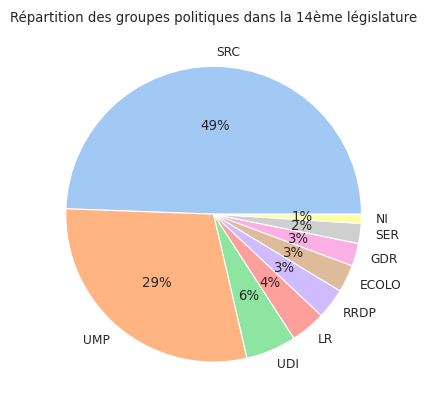

In [209]:
ax = groupe_max["groupe"].value_counts().plot.pie(colors=colors, autopct="%0.0f%%")
ax.set(ylabel="", title="Répartition des groupes politiques dans la 14ème législature");

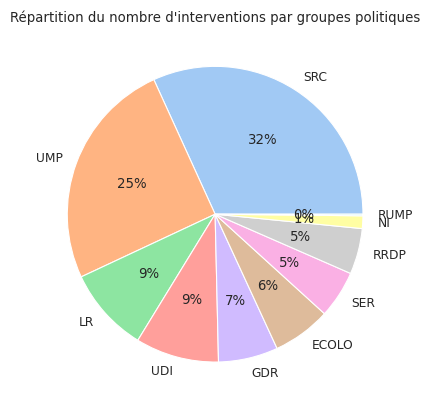

In [212]:
ax = cdf["groupe"].value_counts().plot.pie(colors=colors, autopct="%0.0f%%")
ax.set(ylabel="", title="Répartition du nombre d'interventions par groupes politiques");

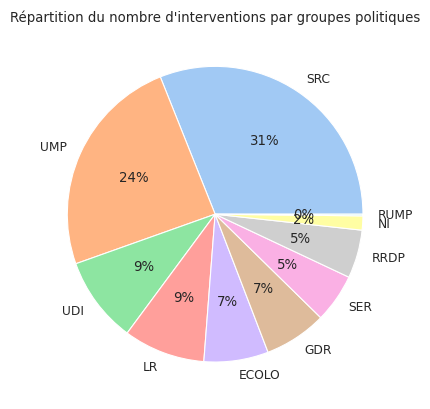

In [216]:
ax = (
    cdf.groupby("groupe")["nb_mots_approx"]
    .sum()
    .sort_values(ascending=False)
    .plot.pie(colors=colors, autopct="%0.0f%%")
)
ax.set(ylabel="", title="Répartition du nombre d'interventions par groupes politiques");

In [198]:
cdf.dtypes

seance_id                      int64
date_seance                   object
nom                           object
groupe                        object
titre                         object
titre_complet                 object
intervention_count             int64
intervention                  object
nb_mots                        int64
nb_mots_approx                 int64
date_naissance                object
sexe                          object
profession                    object
nb_mandats                     int64
date                  datetime64[ns]
year                           int64
month                          int64
day                            int64
y_naissance                    int64
n_y_naissance                float64
n_year                       float64
cos_month                    float64
sin_month                    float64
cos_day                      float64
sin_day                      float64
dtype: object

In [164]:
cdf.head()

,seance_id,date_seance,nom,groupe,titre,titre_complet,intervention,date_naissance,sexe,profession,...,year,month,day,y_naissance,n_y_naissance,n_year,cos_month,sin_month,cos_day,sin_day
0,11,2012-07-03,André Chassaigne,GDR,déclaration de politique générale du gouvernement,déclaration de politique générale du gouvernem...,Dois-je attendre M. le Premier ministre ? Mons...,1950-07-02,H,Principal de collège,...,2012,7,3,1950,0.878049,0.0,-0.866025,-0.5,0.820763,0.571268
1,22,2012-07-04,André Chassaigne,GDR,débat sur les résultats du conseil européen de...,débat sur les résultats du conseil européen de...,Il faut vérifier que le peuple soit d'accord !,1950-07-02,H,Principal de collège,...,2012,7,4,1950,0.878049,0.0,-0.866025,-0.5,0.688967,0.724793
2,79,2012-07-18,André Chassaigne,GDR,article 2,projet de loi de finances rectificative pour 2...,"Quand je vous écoute, chers collègues de l'opp...",1950-07-02,H,Principal de collège,...,2012,7,18,1950,0.878049,0.0,-0.866025,-0.5,-0.874347,-0.485302
3,80,2012-07-19,André Chassaigne,GDR,article 3,projet de loi de finances rectificative pour 2...,Cet article institue au titre de l'année 2012 ...,1950-07-02,H,Principal de collège,...,2012,7,19,1950,0.878049,0.0,-0.866025,-0.5,-0.758758,-0.651372
4,112,2012-07-25,André Chassaigne,GDR,discussion générale,protection physique des matières nucléaires > ...,"Madame la présidente, madame la ministre délég...",1950-07-02,H,Principal de collège,...,2012,7,25,1950,0.878049,0.0,-0.866025,-0.5,0.347305,-0.937752


<AxesSubplot: xlabel='nb_mots_approx', ylabel='Density'>

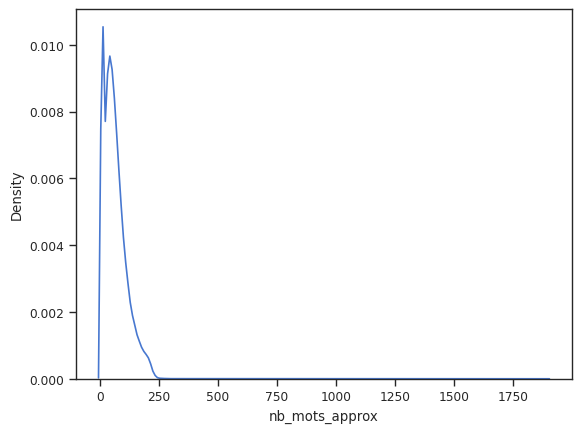

In [227]:
sns.kdeplot(
    data=cdf,
    x="nb_mots_approx",
)

In [228]:
256 * 1.5

384.0